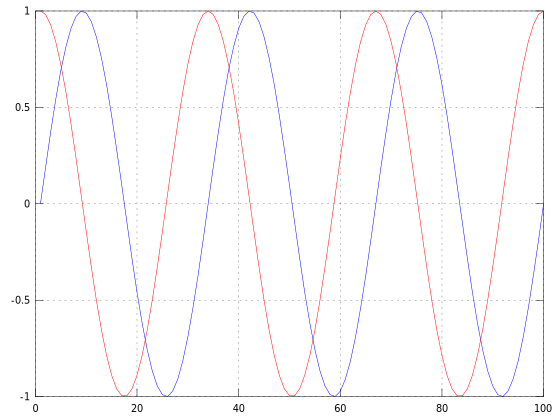

In [4]:
%plot gnuplot
%plot --format svg
t = linspace(0,6*pi,100);
plot(sin(t))
grid on
hold on
plot(cos(t), 'r')

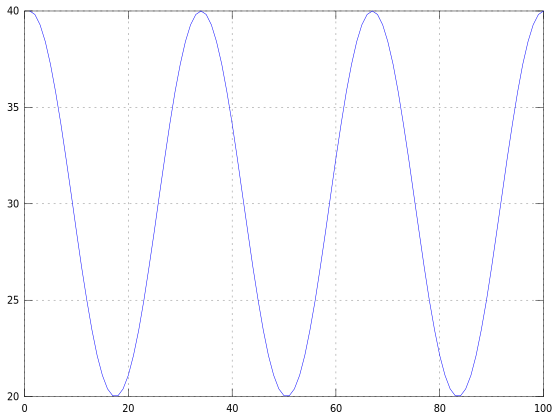

In [3]:
b = 10*cos(t)+30; plot(b); grid on


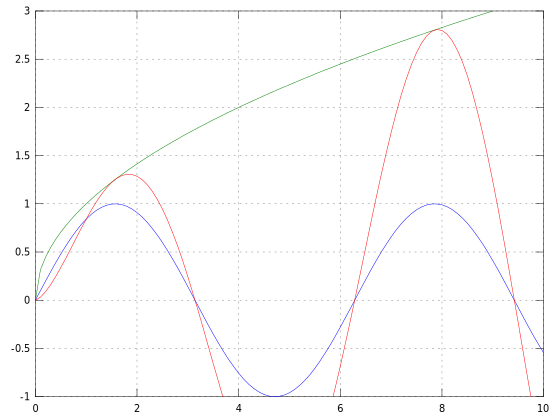

In [5]:
x=0:0.1:10*pi;
y1=sin(x); y2=sqrt(x); y3=sin(x).*sqrt(x);
plot(x,y1,x,y2,x,y3);
legend('off');
grid('on');
axis([0 10 -1 3]);
axis('ij');

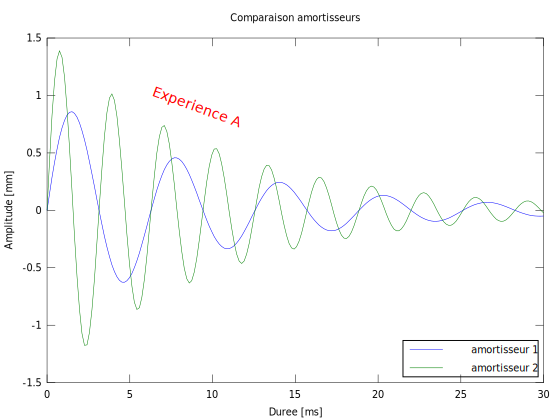

In [8]:
x=linspace(0,30,200);
y1=sin(x)./exp(x/10); y2=1.5*sin(2*x)./exp(x/10);
plot(x,y1,x,y2);
xlabel('Duree [ms]');
ylabel('Amplitude [mm]');
title('Comparaison amortisseurs');
legend('amortisseur 1','amortisseur 2',4);
text(6,1,'Experience A', 'FontSize',14,'Rotation',-20,'Color','red');

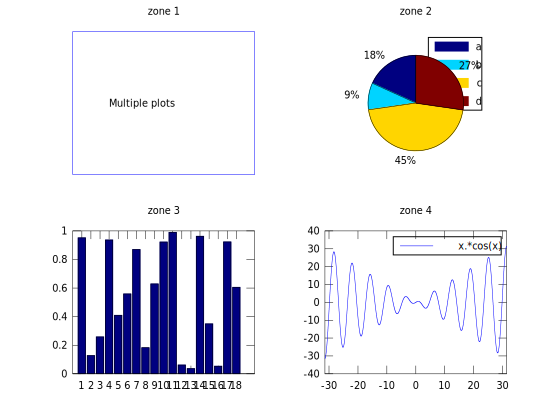

In [9]:
subplot(2,2,1);
plot([0 1 1 0 0],[0 0 1 1 0]);
text(0.2,0.5,'Multiple plots');
axis('off'); legend('off'); title('zone 1');
subplot(2,2,2);
pie([2 1 5 3]); legend('a','b','c','d');
title('zone 2');
subplot(2,2,3);
bar(rand(18,1)); title('zone 3');
subplot(2,2,4);
fplot('x*cos(x)',[-10*pi 10*pi]);
title('zone 4');

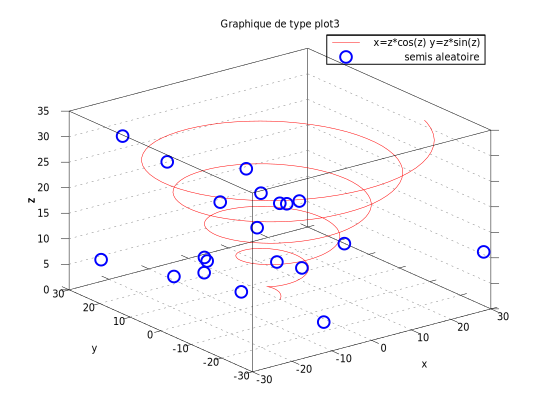

In [20]:
z1=0:0.1:10*pi;
x1=z1.*cos(z1);
y1=z1.*sin(z1);
x2=60*rand(1,20)-30;  % 20 points de coord.
y2=60*rand(1,20)-30;  % -30 < X,Y < 30
z2=35*rand(1,20);     %   0 <  Z  < 35
#figure('Position',[startx,starty,200,200]);
plot3(x1,y1,z1,'r',x2,y2,z2,'o')
axis([-30 30 -30 30 0 35])
grid('on')
xlabel('x'); ylabel('y'); zlabel('z');
title('Graphique de type plot3')
legend('x=z*cos(z) y=z*sin(z)','semis aleatoire',1)
set(gca,'xtick',[-30:10:30])
set(gca,'ytick',[-30:10:30])
set(gca,'ztick',[0:5:35])
set(gca,'Xcolor',[0.5 0.5 0.5],'Ycolor',[0.5 0.5 0.5],
        'Zcolor',[0.5 0.5 0.5]);

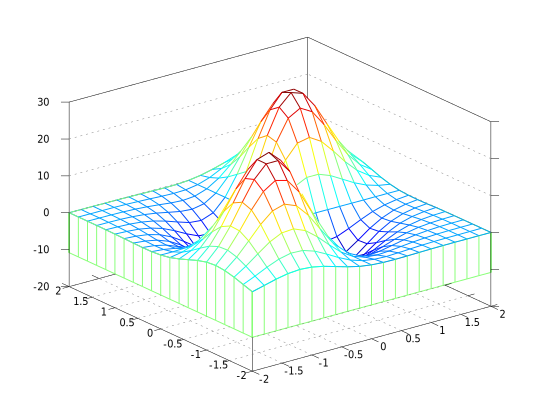

In [14]:
x=-2:0.2:2;  y=x;
[X,Y]=meshgrid(x,y);
Z=100*sin(X).*sin(Y).*exp(-X.^2 + X.*Y - Y.^2);
meshc(X,Y,Z);
meshz(X,Y,Z);


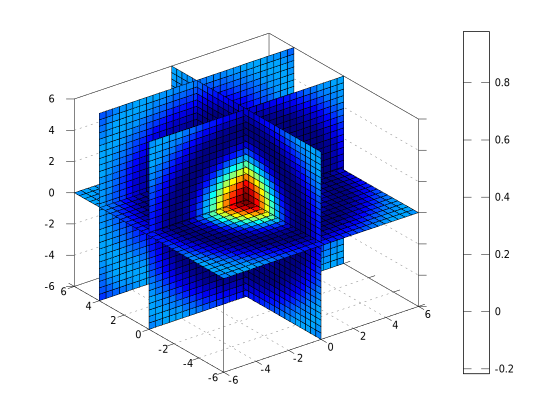

In [15]:
min=-6; max=6; n_grid=30;
v_xyz = linspace(min,max,n_grid);
[Xm,Ym,Zm] = meshgrid(v_xyz, v_xyz, v_xyz);
V = sin( sqrt(Xm.^2 + Ym.^2 + Zm.^2) ) ./sqrt(Xm.^2 + Ym.^2 + Zm.^2);
slice(Xm,Ym,Zm, V,[],[],0)
hold('on')
slice(v_xyz,v_xyz,v_xyz,V,0,[0,4],[])
axis([min max min max min max])
colorbar

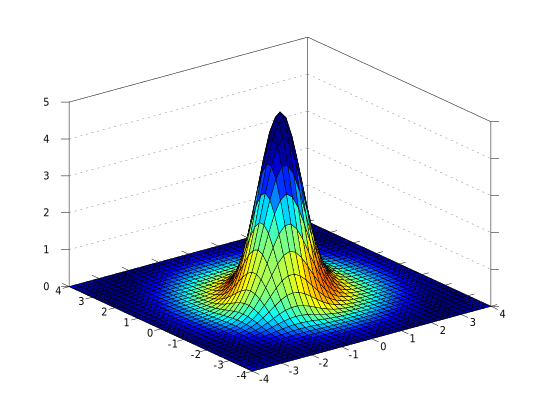

In [17]:
clf
[xi,yi]=meshgrid([-4:0.2:4]);
zi=5*exp(-xi.^2 + xi.*yi - yi.^2);
slice (v_xyz,v_xyz,v_xyz, V, xi,yi,zi)

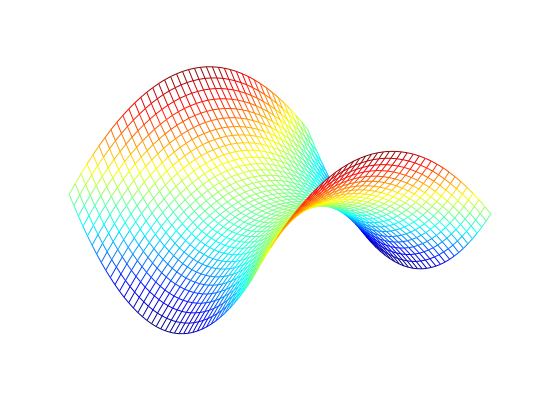

In [18]:
x = -1:0.05:1;
y = x;
[xx, yy] = meshgrid(x,y);
zz = yy.^2 - xx.^2;
mesh(xx, yy, zz)
axis off

In [22]:
pkg load control
%|R=L=C=1|:
R = 1; L = 1; C = 1;
G = tf([1/(R*C) 0],[1 1/(R*C) 1/(L*C)])


Transfer function 'G' from input 'u1' to output ...

           s     
 y1:  -----------
      s^2 + s + 1

Continuous-time model.


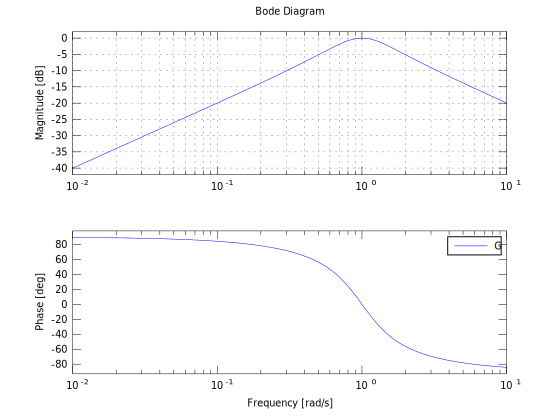

In [23]:
bode(G), grid

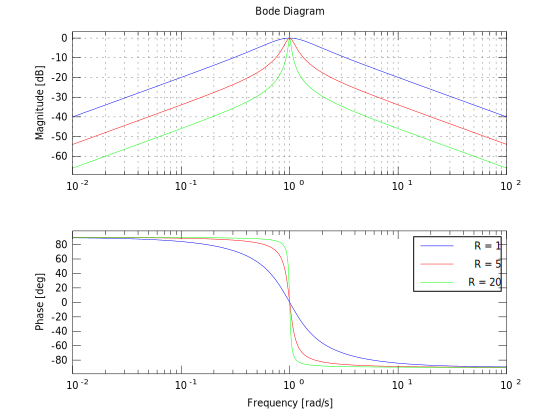

In [24]:
R1 = 5;   G1 = tf([1/(R1*C) 0],[1 1/(R1*C) 1/(L*C)]);
R2 = 20;  G2 = tf([1/(R2*C) 0],[1 1/(R2*C) 1/(L*C)]);
bode(G,'b',G1,'r',G2,'g'), grid
legend('R = 1','R = 5','R = 20')

Forge but has not yet been implemented.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'timeoptions' undefined near line 1 column 7
    lsim at line 89 column 5
    lsim at line 89 column 5
    lsim at line 89 column 5


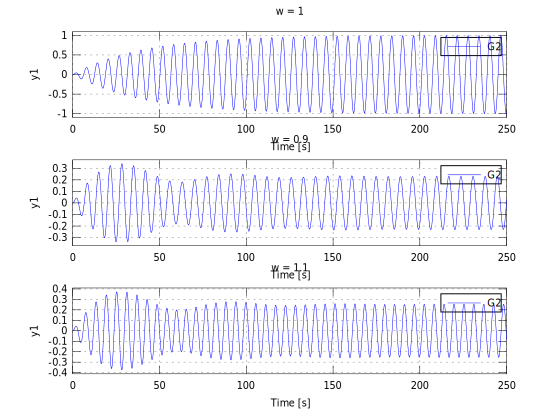

In [26]:
t = 0:0.05:250;
opt = timeoptions;
opt.Title.FontWeight = 'Bold';
subplot(311), lsim(G2,sin(t),t,opt), title('w = 1')
subplot(312), lsim(G2,sin(0.9*t),t,opt), title('w = 0.9')
subplot(313), lsim(G2,sin(1.1*t),t,opt), title('w = 1.1')

In [ ]:
omega = 1;
dy_dt = @(t,y) [y(2);
-omega.^2*sin(y(1))];
odeopt = odeset ('RelTol', 0.00001, 'AbsTol',0.00001,'InitialStep',0.5,'MaxStep',0.5);
[t,y] = ode45(dy_dt,[0 25], [0.0 1.0],odeopt);

subplot(1,2,1);plot(t,y(:,1),'r-',t,y(:,2),'b-');xlabel('time'); legend('y1(t)','y2(t)');

subplot(1,2,2);plot(y(:,1),y(:,2),'b-'); axis([-2.5 2.5 -2.5 2.5]); xlabel('y(2)');ylabel('y(1)');

information try 'help lsode'.  Matlab-compatible ODE functions are
provided by the odepkg package.  See
<http://octave.sourceforge.net/odepkg/>.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'odeset' undefined near line 1 column 10
error: 'odeopt' undefined near line 1 column 36
error: evaluating argument list element number 4
